In [1]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.compose import ColumnTransformer

In [2]:
df = pd.read_csv('C:/Users/alamo248/Downloads/Git/Machine Learning A-Z New/Part 2 - Regression/Section 5 - Multiple Linear Regression/50_Startups.csv')

In [3]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [4]:
x = df.iloc[:,:-1].values

In [5]:
y = df.iloc[:,4].values

In [6]:
labelencoder = LabelEncoder()
x[:, 3] = labelencoder.fit_transform(x[:, 3])
ColumnTransformer = ColumnTransformer([("State", OneHotEncoder(),[3])], remainder="passthrough")
x = ColumnTransformer.fit_transform(x)

In [7]:
x = x[:, 1:]

In [8]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2, random_state = 0)

In [9]:
reg = LinearRegression()
reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [10]:
y_pred = reg.predict(x_test)

ValueError: Expected 2D array, got 1D array instead:
array=[1. 0. 1. 0. 1. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

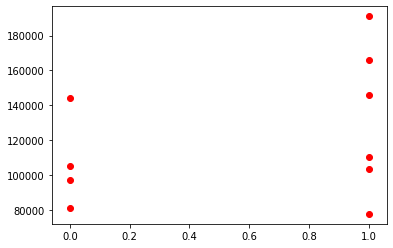

In [13]:
plt.scatter(x_test[:,0], y_test, color = 'red')
plt.plot(x_train, reg.predict(x_train), color = 'blue')
plt.title('Training set')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()